In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from env import get_db_url
import wrangle_zillow as w
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

In [2]:
# creating df variable

In [3]:
df = w.get_zillow_data()

In [4]:
columns = ['buildingqualitytypeid','heatingorsystemdesc','heatingorsystemtypeid','unitcnt','propertyzoningdesc','propertylandusedesc','parcelid.1','id.1','censustractandblock']

In [5]:
#using handle missing values function
df = w.data_prep(df,columns)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50604 entries, 0 to 52318
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   propertylandusetypeid       50604 non-null  float64
 1   parcelid                    50604 non-null  int64  
 2   id                          50604 non-null  int64  
 3   baths                       50604 non-null  float64
 4   beds                        50604 non-null  float64
 5   calculatedbathnbr           50604 non-null  float64
 6   sqft                        50604 non-null  float64
 7   finishedsquarefeet12        50604 non-null  float64
 8   fips                        50604 non-null  float64
 9   fullbathcnt                 50604 non-null  float64
 10  latitude                    50604 non-null  float64
 11  longitude                   50604 non-null  float64
 12  lotsizesquarefeet           50604 non-null  float64
 13  propertycountylandusecode   506

In [7]:
df = w.prepare_zillow(df)

/Users/zacharystufflebeme/codeup-data-science/zach-allante/clustering-project/wrangle_zillow.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.orange_county[df.location == 1] = 1
/Users/zacharystufflebeme/codeup-data-science/zach-allante/clustering-project/wrangle_zillow.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ventura[df.location == 2] = 1
/Users/zacharystufflebeme/codeup-data-science/zach-allante/clustering-project/wrangle_zillow.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50604 entries, 0 to 52318
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   propertylandusetypeid       50604 non-null  float64
 1   parcelid                    50604 non-null  int64  
 2   id                          50604 non-null  int64  
 3   baths                       50604 non-null  float64
 4   beds                        50604 non-null  float64
 5   calculatedbathnbr           50604 non-null  float64
 6   sqft                        50604 non-null  float64
 7   finishedsquarefeet12        50604 non-null  float64
 8   fips                        50604 non-null  object 
 9   fullbathcnt                 50604 non-null  float64
 10  latitude                    50604 non-null  float64
 11  longitude                   50604 non-null  float64
 12  lotsizesquarefeet           50604 non-null  float64
 13  propertycountylandusecode   506

In [9]:
train, validate, test = w.wrangle_zillow(df)

In [10]:
train

,propertylandusetypeid,parcelid,id,baths,beds,calculatedbathnbr,sqft,finishedsquarefeet12,fips,fullbathcnt,...,assessmentyear,landtaxvaluedollarcnt,taxamount,max_transactiondate,logerror,transactiondate,location,orange_county,ventura,losangeles
13535,261.0,12397906,66906,1.0,2.0,1.0,872.0,872.0,Los Angeles CA,1.0,...,2016.0,266297.0,4357.93,2017-03-24,0.026998,2017-03-24,0,0,0,1
30453,261.0,14380619,2800936,3.0,3.0,3.0,2260.0,2260.0,Orange County CA,3.0,...,2016.0,142053.0,3515.14,2017-06-09,0.037181,2017-06-09,1,1,0,0
13337,261.0,12902896,1127949,2.0,3.0,2.0,1091.0,1091.0,Los Angeles CA,2.0,...,2016.0,50642.0,1893.90,2017-03-24,0.019205,2017-03-24,0,0,0,1
7660,261.0,11568321,2658421,6.0,5.0,6.0,4783.0,4783.0,Los Angeles CA,6.0,...,2016.0,2288518.0,47785.18,2017-02-22,0.037875,2017-02-22,0,0,0,1
34175,261.0,13100555,1758804,5.0,5.0,5.0,4425.0,4425.0,Los Angeles CA,5.0,...,2016.0,540465.0,14379.50,2017-06-27,0.002652,2017-06-27,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38066,261.0,14238880,638264,2.0,3.0,2.0,1611.0,1611.0,Orange County CA,2.0,...,2016.0,548239.0,7041.04,2017-07-12,-0.006377,2017-07-12,1,1,0,0
48425,261.0,12438510,2110521,3.0,5.0,3.0,2652.0,2652.0,Los Angeles CA,3.0,...,2016.0,414596.0,9365.87,2017-08-30,-0.008494,2017-08-30,0,0,0,1
19647,261.0,11508139,2077101,2.0,3.0,2.0,1962.0,1962.0,Los Angeles CA,2.0,...,2016.0,276422.0,4630.60,2017-04-25,0.680864,2017-04-25,0,0,0,1
21717,261.0,14314819,161303,2.0,3.0,2.0,1714.0,1714.0,Orange County CA,2.0,...,2016.0,271335.0,4590.46,2017-05-03,0.038707,2017-05-03,1,1,0,0


In [11]:
trainExplore = train
trainExplore['logerror_bin'] = pd.cut(train.logerror, [-5,-1,-.75,-.5,-.25,0,.25,.50,.75, 1, 5])
trainExplore['latitude_bin'] = pd.cut(train.latitude, [0,33600000,34200000,34600000,35000000])
trainExplore['longitude_bin'] = pd.cut(train.longitude, [-119200000,-119000000,-118600000,-117800000,0])
trainExplore['squarefeet_bin'] = pd.cut(train.sqft,[0,3000,8000,12000])
trainExplore['age_bin'] = pd.cut(train.age, [0,30,60,90,120])
trainExplore['lowerrors'] = pd.cut(train.logerror, [-.25,0,.25,.5])




In [12]:
features = ['sqft','age','latitude','longitude','lotsizesquarefeet','beds','baths']


In [13]:
train_df = train[features]
validate_df = validate[features]
test_df = test[features]

In [14]:
scaled_x_train = w.scale_zillow(train_df,features)
scaled_x_validate = w.scale_zillow(validate_df, features)
scaled_x_test = w.scale_zillow(test_df, features)

/Users/zacharystufflebeme/codeup-data-science/zach-allante/clustering-project/wrangle_zillow.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impdf[impfeats] = Scaler.fit_transform(impdf[impfeats])
/Users/zacharystufflebeme/codeup-data-science/zach-allante/clustering-project/wrangle_zillow.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impdf[impfeats] = Scaler.fit_transform(impdf[impfeats])
/Users/zacharystufflebeme/codeup-data-science/zach-allante/clustering-project/wrangle_zillow.py:135: Setti

In [15]:
scaled_x_train

,sqft,age,latitude,longitude,lotsizesquarefeet,beds,baths
13535,0.047065,0.496183,0.419008,0.721678,0.000709,0.181818,0.0
30453,0.137796,0.305344,0.187552,0.940035,0.000970,0.272727,0.2
13337,0.061381,0.419847,0.517215,0.862331,0.001040,0.272727,0.1
7660,0.302719,0.022901,0.478061,0.521215,0.001500,0.454545,0.5
34175,0.279318,0.129771,0.442146,0.853861,0.001455,0.454545,0.4
...,...,...,...,...,...,...,...
38066,0.095372,0.419847,0.300245,0.858216,0.001145,0.272727,0.1
48425,0.163420,0.389313,0.322257,0.730793,0.000769,0.454545,0.2
19647,0.118316,0.496183,0.367894,0.555180,0.000220,0.272727,0.1
21717,0.102105,0.343511,0.187921,0.847327,0.000860,0.272727,0.1


In [16]:
location = ['latitude','longitude','age']
location_x_train = scaled_x_train[location]
structure = ['beds','baths']
structure_x_train = scaled_x_train[structure]
Foundation = ['sqft','lotsizesquarefeet']
foundation_x_train = scaled_x_train[Foundation]


In [17]:
location_x_train['agebin'] =  pd.cut(location_x_train.age, [0,30,60,90,120])

/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_54953/4159171245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_x_train['agebin'] =  pd.cut(location_x_train.age, [0,30,60,90,120])


In [18]:
train_df.head()

,sqft,age,latitude,longitude,lotsizesquarefeet,beds,baths
13535,0.047065,0.496183,0.419008,0.721678,0.000709,0.181818,0.0
30453,0.137796,0.305344,0.187552,0.940035,0.000970,0.272727,0.2
13337,0.061381,0.419847,0.517215,0.862331,0.001040,0.272727,0.1
7660,0.302719,0.022901,0.478061,0.521215,0.001500,0.454545,0.5
34175,0.279318,0.129771,0.442146,0.853861,0.001455,0.454545,0.4


In [19]:
trainExplore.logerror_bin

13535     (0.0, 0.25]
30453     (0.0, 0.25]
13337     (0.0, 0.25]
7660      (0.0, 0.25]
34175     (0.0, 0.25]
             ...     
38066    (-0.25, 0.0]
48425    (-0.25, 0.0]
19647     (0.5, 0.75]
21717     (0.0, 0.25]
14227    (-0.25, 0.0]
Name: logerror_bin, Length: 28338, dtype: category
Categories (10, interval[float64, right]): [(-5.0, -1.0] < (-1.0, -0.75] < (-0.75, -0.5] < (-0.5, -0.25] ... (0.25, 0.5] < (0.5, 0.75] < (0.75, 1.0] < (1.0, 5.0]]

In [20]:
trainExplore

,propertylandusetypeid,parcelid,id,baths,beds,calculatedbathnbr,sqft,finishedsquarefeet12,fips,fullbathcnt,...,location,orange_county,ventura,losangeles,logerror_bin,latitude_bin,longitude_bin,squarefeet_bin,age_bin,lowerrors
13535,261.0,12397906,66906,1.0,2.0,1.0,872.0,872.0,Los Angeles CA,1.0,...,0,0,0,1,"(0.0, 0.25]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(60, 90]","(0.0, 0.25]"
30453,261.0,14380619,2800936,3.0,3.0,3.0,2260.0,2260.0,Orange County CA,3.0,...,1,1,0,0,"(0.0, 0.25]","(33600000, 34200000]","(-117800000, 0]","(0, 3000]","(30, 60]","(0.0, 0.25]"
13337,261.0,12902896,1127949,2.0,3.0,2.0,1091.0,1091.0,Los Angeles CA,2.0,...,0,0,0,1,"(0.0, 0.25]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(60, 90]","(0.0, 0.25]"
7660,261.0,11568321,2658421,6.0,5.0,6.0,4783.0,4783.0,Los Angeles CA,6.0,...,0,0,0,1,"(0.0, 0.25]","(33600000, 34200000]","(-118600000, -117800000]","(3000, 8000]","(0, 30]","(0.0, 0.25]"
34175,261.0,13100555,1758804,5.0,5.0,5.0,4425.0,4425.0,Los Angeles CA,5.0,...,0,0,0,1,"(0.0, 0.25]","(33600000, 34200000]","(-118600000, -117800000]","(3000, 8000]","(0, 30]","(0.0, 0.25]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38066,261.0,14238880,638264,2.0,3.0,2.0,1611.0,1611.0,Orange County CA,2.0,...,1,1,0,0,"(-0.25, 0.0]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(60, 90]","(-0.25, 0.0]"
48425,261.0,12438510,2110521,3.0,5.0,3.0,2652.0,2652.0,Los Angeles CA,3.0,...,0,0,0,1,"(-0.25, 0.0]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(30, 60]","(-0.25, 0.0]"
19647,261.0,11508139,2077101,2.0,3.0,2.0,1962.0,1962.0,Los Angeles CA,2.0,...,0,0,0,1,"(0.5, 0.75]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(60, 90]",NaN
21717,261.0,14314819,161303,2.0,3.0,2.0,1714.0,1714.0,Orange County CA,2.0,...,1,1,0,0,"(0.0, 0.25]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(30, 60]","(0.0, 0.25]"


In [21]:
trainExplore.sqft.max()

15450.0

In [22]:
trainExplore.lotsizesquarefeet.mode()

0    6000.0
Name: lotsizesquarefeet, dtype: float64

In [23]:
#fig, ax = plt.subplots()
#sns.scatterplot(data = trainExplore[trainExplore.FCluster2 == 1], x = 'sqft', y= 'lotsizesquarefeet', hue = 'logerror_bin', size = 10)
#ax.set_xlim(0,14000)
#ax.set_ylim(0,100000)
#plt.show()

In [24]:
train['logerror_bin'] = pd.cut(train.logerror, [-5,-.75,-.25,0,.25,.75, 5])

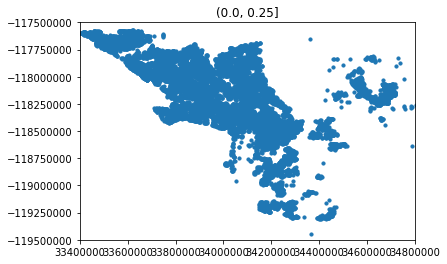

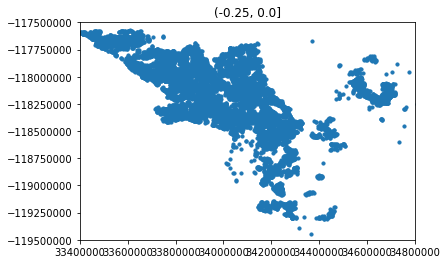

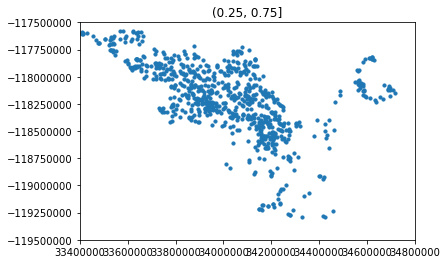

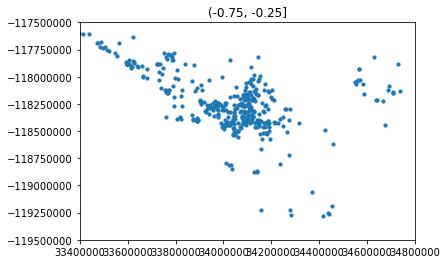

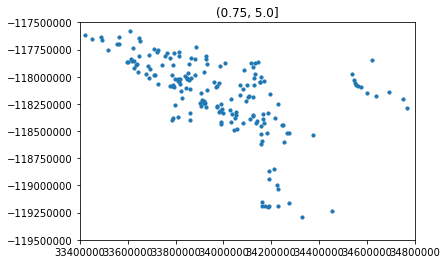

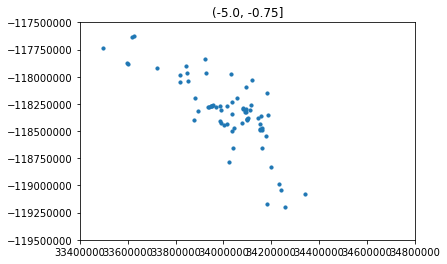

In [25]:
for x in train.logerror_bin.value_counts().index:
    plt.scatter(x='latitude', y='longitude', data=train[train.logerror_bin == x], s = 10)
    plt.title(x)
    plt.xlim(33400000,34800000)
    plt.ylim(-119500000,-117500000)
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()


In [26]:
clusters = pd.DataFrame([])
best = pd.DataFrame([])
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_x_train[location])
    location_x_train['bestLocation'] = kmeans.predict(scaled_x_train[location])
    location_x_train['locationcluster',i] = kmeans.predict(scaled_x_train[location])
    clusters['locationclusters',i] = kmeans.predict(scaled_x_train[location])

/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_54953/3004995924.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_x_train['bestLocation'] = kmeans.predict(scaled_x_train[location])
/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_54953/3004995924.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_x_train['locationcluster',i] = kmeans.predict(scaled_x_train[location])
/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_54953/3004995924.py:6: SettingWithCopyWa

In [27]:
clusters = pd.DataFrame([])
best = pd.DataFrame([])
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_x_train[structure])
    structure_x_train['bestStructure'] = kmeans.predict(scaled_x_train[structure])
    structure_x_train['structurecluster',i] = kmeans.predict(scaled_x_train[structure])
    clusters['structureclusters',i] = kmeans.predict(scaled_x_train[structure])

/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_54953/1566715296.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  structure_x_train['bestStructure'] = kmeans.predict(scaled_x_train[structure])
/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_54953/1566715296.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  structure_x_train['structurecluster',i] = kmeans.predict(scaled_x_train[structure])
/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_54953/1566715296.py:6: SettingWith

In [28]:
clusters = pd.DataFrame([])
best = pd.DataFrame([])
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_x_train[Foundation])
    foundation_x_train['bestFoundation'] = kmeans.predict(scaled_x_train[Foundation])
    foundation_x_train['foundationcluster',i] = kmeans.predict(scaled_x_train[Foundation])
    clusters['foundationclusters',i] = kmeans.predict(scaled_x_train[Foundation])

/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_54953/3898386243.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foundation_x_train['bestFoundation'] = kmeans.predict(scaled_x_train[Foundation])
/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_54953/3898386243.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foundation_x_train['foundationcluster',i] = kmeans.predict(scaled_x_train[Foundation])
/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_54953/3898386243.py:6: Setti

In [29]:
kmeans = KMeans(n_clusters=5, random_state = 123)
kmeans.fit(scaled_x_train[structure])
structure_x_train['bestStructure'] = kmeans.predict(scaled_x_train[structure])

In [30]:
kmeans = KMeans(n_clusters=5, random_state = 123)
kmeans.fit(scaled_x_train[location])
location_x_train['bestLocation'] = kmeans.predict(scaled_x_train[location])
scaled_x_validate['bestLocation'] = kmeans.predict(scaled_x_validate[location])
scaled_x_test['bestLocation'] = kmeans.predict(scaled_x_test[location])
train['bestLocation'] = kmeans.predict(scaled_x_train[location])


/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_54953/1519091789.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_x_validate['bestLocation'] = kmeans.predict(scaled_x_validate[location])
/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_54953/1519091789.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_x_test['bestLocation'] = kmeans.predict(scaled_x_test[location])


In [31]:
kmeans = KMeans(n_clusters=4, random_state = 123)
kmeans.fit(scaled_x_train[Foundation])
foundation_x_train['bestFoundation'] = kmeans.predict(scaled_x_train[Foundation])
scaled_x_validate['bestFoundation'] = kmeans.predict(scaled_x_validate[Foundation])
scaled_x_test['bestFoundation'] = kmeans.predict(scaled_x_test[Foundation])
train['bestFoundation'] = kmeans.predict(scaled_x_train[Foundation])

/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_54953/3314975117.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_x_validate['bestFoundation'] = kmeans.predict(scaled_x_validate[Foundation])
/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_54953/3314975117.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_x_test['bestFoundation'] = kmeans.predict(scaled_x_test[Foundation])


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.wa

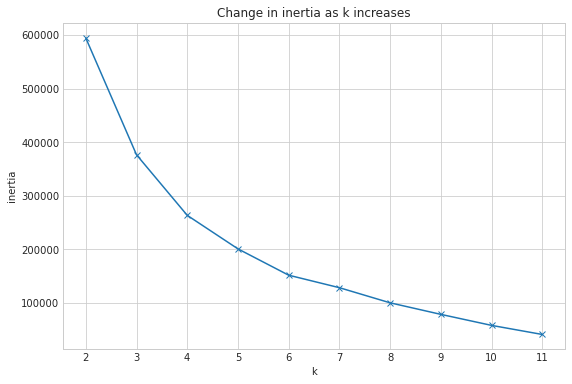

In [32]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(foundation_x_train).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


In [33]:
location_x_train

,latitude,longitude,age,agebin,bestLocation,"(locationcluster, 2)","(locationcluster, 3)","(locationcluster, 4)","(locationcluster, 5)","(locationcluster, 6)","(locationcluster, 7)","(locationcluster, 8)","(locationcluster, 9)"
13535,0.419008,0.721678,0.496183,"(0, 30]",1,1,1,0,0,0,6,7,6
30453,0.187552,0.940035,0.305344,"(0, 30]",4,1,0,2,1,1,2,0,4
13337,0.517215,0.862331,0.419847,"(0, 30]",1,1,1,0,0,0,6,3,8
7660,0.478061,0.521215,0.022901,"(0, 30]",2,0,2,1,3,4,3,5,0
34175,0.442146,0.853861,0.129771,"(0, 30]",4,1,0,2,1,1,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38066,0.300245,0.858216,0.419847,"(0, 30]",1,1,0,2,0,0,6,3,1
48425,0.322257,0.730793,0.389313,"(0, 30]",1,1,0,2,0,0,6,3,1
19647,0.367894,0.555180,0.496183,"(0, 30]",3,0,1,0,4,0,6,7,6
21717,0.187921,0.847327,0.343511,"(0, 30]",4,1,0,2,1,1,2,0,1


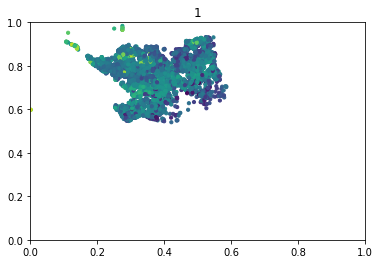

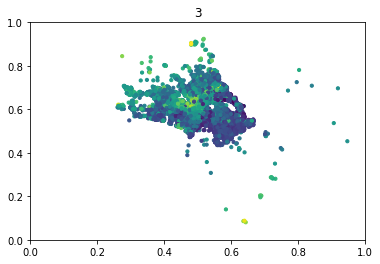

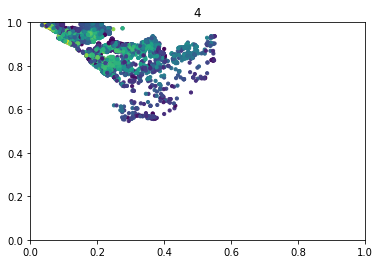

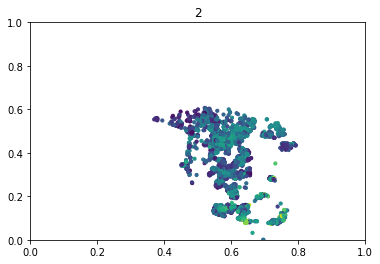

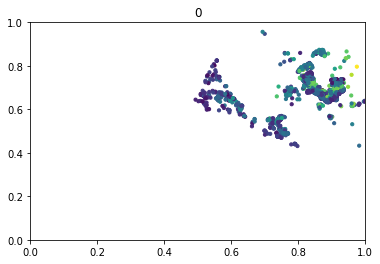

In [34]:
for x in location_x_train['bestLocation'].value_counts().index:
    plt.scatter(x=location_x_train.latitude[location_x_train.bestLocation == x], y=location_x_train.longitude[location_x_train.bestLocation == x], c = location_x_train.age[location_x_train.bestLocation == x], s = 10)
    plt.title(x)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()


In [35]:
location_x_train['bestLocation'].value_counts().index

Int64Index([1, 3, 4, 2, 0], dtype='int64')

In [36]:
train_df.head()

,sqft,age,latitude,longitude,lotsizesquarefeet,beds,baths
13535,0.047065,0.496183,0.419008,0.721678,0.000709,0.181818,0.0
30453,0.137796,0.305344,0.187552,0.940035,0.000970,0.272727,0.2
13337,0.061381,0.419847,0.517215,0.862331,0.001040,0.272727,0.1
7660,0.302719,0.022901,0.478061,0.521215,0.001500,0.454545,0.5
34175,0.279318,0.129771,0.442146,0.853861,0.001455,0.454545,0.4


In [37]:
clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28338 entries, 0 to 28337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   (foundationclusters, 2)  28338 non-null  int32
 1   (foundationclusters, 3)  28338 non-null  int32
 2   (foundationclusters, 4)  28338 non-null  int32
 3   (foundationclusters, 5)  28338 non-null  int32
 4   (foundationclusters, 6)  28338 non-null  int32
 5   (foundationclusters, 7)  28338 non-null  int32
 6   (foundationclusters, 8)  28338 non-null  int32
 7   (foundationclusters, 9)  28338 non-null  int32
dtypes: int32(8)
memory usage: 885.7 KB


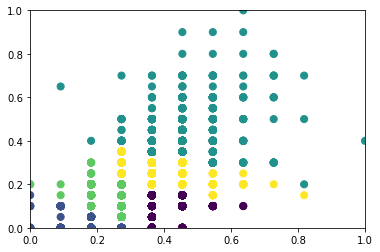

In [38]:
plt.scatter(x=structure_x_train.beds, y=structure_x_train.baths, c = structure_x_train.bestStructure , s = 50)

plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

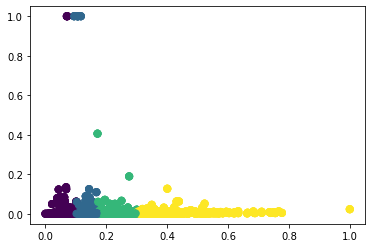

In [39]:
for x in foundation_x_train['bestFoundation'].value_counts().index:
    plt.scatter(x = foundation_x_train.sqft, y = foundation_x_train.lotsizesquarefeet, c = foundation_x_train.bestFoundation, s = 50)

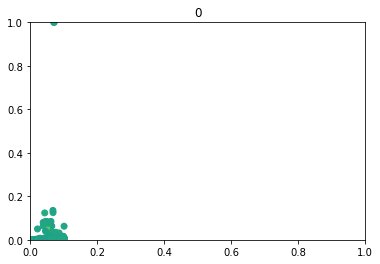

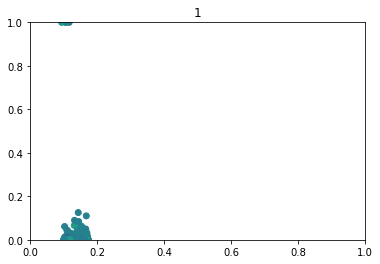

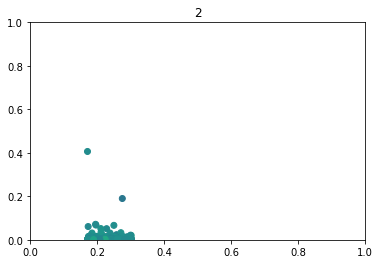

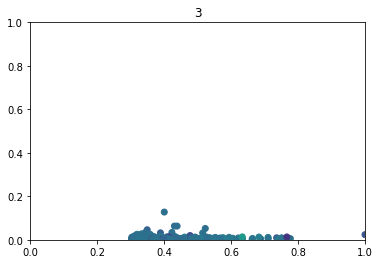

In [40]:
for x in foundation_x_train['bestFoundation'].value_counts().index:
    plt.scatter(foundation_x_train.sqft[foundation_x_train.bestFoundation == x], foundation_x_train.lotsizesquarefeet[foundation_x_train.bestFoundation == x], c = train.logerror[foundation_x_train.bestFoundation == x])
    plt.title(x)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()


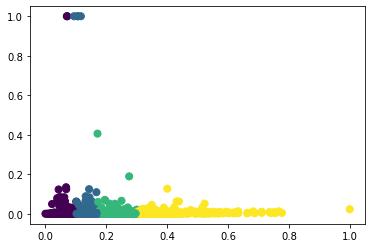

In [41]:

plt.scatter(x = foundation_x_train.sqft, y = foundation_x_train.lotsizesquarefeet, c = foundation_x_train.bestFoundation, s = 50)

In [42]:
foundation_x_train.sqft

13535    0.047065
30453    0.137796
13337    0.061381
7660     0.302719
34175    0.279318
           ...   
38066    0.095372
48425    0.163420
19647    0.118316
21717    0.102105
14227    0.155184
Name: sqft, Length: 28338, dtype: float64

In [43]:
scaled_x_train

,sqft,age,latitude,longitude,lotsizesquarefeet,beds,baths
13535,0.047065,0.496183,0.419008,0.721678,0.000709,0.181818,0.0
30453,0.137796,0.305344,0.187552,0.940035,0.000970,0.272727,0.2
13337,0.061381,0.419847,0.517215,0.862331,0.001040,0.272727,0.1
7660,0.302719,0.022901,0.478061,0.521215,0.001500,0.454545,0.5
34175,0.279318,0.129771,0.442146,0.853861,0.001455,0.454545,0.4
...,...,...,...,...,...,...,...
38066,0.095372,0.419847,0.300245,0.858216,0.001145,0.272727,0.1
48425,0.163420,0.389313,0.322257,0.730793,0.000769,0.454545,0.2
19647,0.118316,0.496183,0.367894,0.555180,0.000220,0.272727,0.1
21717,0.102105,0.343511,0.187921,0.847327,0.000860,0.272727,0.1


In [44]:
foundation_x_train


,sqft,lotsizesquarefeet,bestFoundation,"(foundationcluster, 2)","(foundationcluster, 3)","(foundationcluster, 4)","(foundationcluster, 5)","(foundationcluster, 6)","(foundationcluster, 7)","(foundationcluster, 8)","(foundationcluster, 9)"
13535,0.047065,0.000709,0,0,0,0,1,1,6,1,0
30453,0.137796,0.000970,1,0,1,2,3,5,5,7,7
13337,0.061381,0.001040,0,0,0,0,1,1,6,1,0
7660,0.302719,0.001500,3,1,2,3,2,3,4,4,4
34175,0.279318,0.001455,2,1,2,1,0,3,4,5,4
...,...,...,...,...,...,...,...,...,...,...,...
38066,0.095372,0.001145,0,0,0,0,1,5,0,3,8
48425,0.163420,0.000769,1,1,1,2,3,0,5,0,7
19647,0.118316,0.000220,1,0,0,2,3,5,0,7,2
21717,0.102105,0.000860,1,0,0,2,3,5,0,3,2


In [45]:
train

,propertylandusetypeid,parcelid,id,baths,beds,calculatedbathnbr,sqft,finishedsquarefeet12,fips,fullbathcnt,...,ventura,losangeles,logerror_bin,latitude_bin,longitude_bin,squarefeet_bin,age_bin,lowerrors,bestLocation,bestFoundation
13535,261.0,12397906,66906,1.0,2.0,1.0,872.0,872.0,Los Angeles CA,1.0,...,0,1,"(0.0, 0.25]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(60, 90]","(0.0, 0.25]",1,0
30453,261.0,14380619,2800936,3.0,3.0,3.0,2260.0,2260.0,Orange County CA,3.0,...,0,0,"(0.0, 0.25]","(33600000, 34200000]","(-117800000, 0]","(0, 3000]","(30, 60]","(0.0, 0.25]",4,1
13337,261.0,12902896,1127949,2.0,3.0,2.0,1091.0,1091.0,Los Angeles CA,2.0,...,0,1,"(0.0, 0.25]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(60, 90]","(0.0, 0.25]",1,0
7660,261.0,11568321,2658421,6.0,5.0,6.0,4783.0,4783.0,Los Angeles CA,6.0,...,0,1,"(0.0, 0.25]","(33600000, 34200000]","(-118600000, -117800000]","(3000, 8000]","(0, 30]","(0.0, 0.25]",2,3
34175,261.0,13100555,1758804,5.0,5.0,5.0,4425.0,4425.0,Los Angeles CA,5.0,...,0,1,"(0.0, 0.25]","(33600000, 34200000]","(-118600000, -117800000]","(3000, 8000]","(0, 30]","(0.0, 0.25]",4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38066,261.0,14238880,638264,2.0,3.0,2.0,1611.0,1611.0,Orange County CA,2.0,...,0,0,"(-0.25, 0.0]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(60, 90]","(-0.25, 0.0]",1,0
48425,261.0,12438510,2110521,3.0,5.0,3.0,2652.0,2652.0,Los Angeles CA,3.0,...,0,1,"(-0.25, 0.0]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(30, 60]","(-0.25, 0.0]",1,1
19647,261.0,11508139,2077101,2.0,3.0,2.0,1962.0,1962.0,Los Angeles CA,2.0,...,0,1,"(0.25, 0.75]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(60, 90]",NaN,3,1
21717,261.0,14314819,161303,2.0,3.0,2.0,1714.0,1714.0,Orange County CA,2.0,...,0,0,"(0.0, 0.25]","(33600000, 34200000]","(-118600000, -117800000]","(0, 3000]","(30, 60]","(0.0, 0.25]",4,1


In [46]:
locationCluster1Sample = train[train.bestLocation == 1].logerror

In [47]:
alpha = .05


Hnull - mean log error of people within locationcluster two is the same as mean log error of total population
Halt - mean log error of people within locationcluster two is different than the mean log error of total population.

loc cluster 1

In [48]:
overall_mean = train.logerror.mean()

In [49]:
t,p = stats.ttest_1samp(locationCluster1Sample,overall_mean)
print(t,p/2,alpha)

1.8787380671142393 0.030155960666734778 0.05


In [50]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


We reject $H_{0}$


As you can see location cluster 1 does not have the same mean as the population

In [51]:
foundationCluster2Sample = train[train.bestFoundation == 2].logerror

Hnull - mean log error of people in foundationcluster1 is same as general population
Halt - mean log error of people in foundationcluster1 is different than general population

In [52]:
t,p = stats.ttest_1samp(foundationCluster2Sample,overall_mean)
print(t,p/2,alpha)

3.210899327927847 0.0006674728094978034 0.05


In [53]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


We reject $H_{0}$


cluster 2

In [54]:
pd.get_dummies(location_x_train['bestLocation'])

,0,1,2,3,4
13535,0,1,0,0,0
30453,0,0,0,0,1
13337,0,1,0,0,0
7660,0,0,1,0,0
34175,0,0,0,0,1
...,...,...,...,...,...
38066,0,1,0,0,0
48425,0,1,0,0,0
19647,0,0,0,1,0
21717,0,0,0,0,1


In [55]:
scaled_x_train[['LCluster0','LCluster1','LCluster2','LCluster3','LCluster4']] = pd.get_dummies(location_x_train['bestLocation'])
scaled_x_train[['FCluster0','FCluster1','FCluster2','FCluster3']] =pd.get_dummies(foundation_x_train['bestFoundation'])
scaled_x_validate[['LCluster0','LCluster1','LCluster2','LCluster3','LCluster4']] = pd.get_dummies(scaled_x_validate['bestLocation'])
scaled_x_validate[['FCluster0','FCluster1','FCluster2','FCluster3']] =pd.get_dummies(scaled_x_validate['bestFoundation'])
scaled_x_test[['LCluster0','LCluster1','LCluster2','LCluster3','LCluster4']] = pd.get_dummies(scaled_x_test['bestLocation'])
scaled_x_test[['FCluster0','FCluster1','FCluster2','FCluster3']] =pd.get_dummies(scaled_x_test['bestFoundation'])

/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_54953/3366170360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_x_train[['LCluster0','LCluster1','LCluster2','LCluster3','LCluster4']] = pd.get_dummies(location_x_train['bestLocation'])
/var/folders/yn/3nqd95h90wd7cdqr1w2mwmz40000gn/T/ipykernel_54953/3366170360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_x_train[['LCluster0','LCluster1','LCluster2','LCluster3','LCluster4']] = pd.get_dummies(location_x_train['bestLocation']

In [56]:
scaled_x_train = scaled_x_train.drop(columns = ['LCluster0','LCluster2','LCluster3','FCluster0','FCluster1','FCluster3'])
scaled_x_validate = scaled_x_validate.drop(columns = ['bestLocation','LCluster0','LCluster2','LCluster3','FCluster0','FCluster1','FCluster3'])
scaled_x_test = scaled_x_test.drop(columns = ['bestLocation','bestFoundation','LCluster0','LCluster2','LCluster3','FCluster0','FCluster1','FCluster3'])

In [57]:
#unscaled_x_train = scaled_x_train
#unscaled_x_validate = scaled_x_validate
scaled_x_train

,sqft,age,latitude,longitude,lotsizesquarefeet,beds,baths,LCluster1,LCluster4,FCluster2
13535,0.047065,0.496183,0.419008,0.721678,0.000709,0.181818,0.0,1,0,0
30453,0.137796,0.305344,0.187552,0.940035,0.000970,0.272727,0.2,0,1,0
13337,0.061381,0.419847,0.517215,0.862331,0.001040,0.272727,0.1,1,0,0
7660,0.302719,0.022901,0.478061,0.521215,0.001500,0.454545,0.5,0,0,0
34175,0.279318,0.129771,0.442146,0.853861,0.001455,0.454545,0.4,0,1,1
...,...,...,...,...,...,...,...,...,...,...
38066,0.095372,0.419847,0.300245,0.858216,0.001145,0.272727,0.1,1,0,0
48425,0.163420,0.389313,0.322257,0.730793,0.000769,0.454545,0.2,1,0,0
19647,0.118316,0.496183,0.367894,0.555180,0.000220,0.272727,0.1,0,0,0
21717,0.102105,0.343511,0.187921,0.847327,0.000860,0.272727,0.1,0,1,0


In [58]:
y_train = train.logerror
y_train = pd.DataFrame(y_train)
x_validate = validate[features]
y_validate = validate.logerror
y_validate = pd.DataFrame(y_validate)
x_test = test[features]
y_test = test.logerror
y_test = pd.DataFrame(y_test)

In [59]:
scaled_x_validate

,sqft,age,latitude,longitude,lotsizesquarefeet,beds,baths,bestFoundation,LCluster1,LCluster4,FCluster2
26924,0.028930,0.585938,0.380368,0.650977,0.002704,0.3,0.000000,0,0,0,0
6382,0.073624,0.742188,0.499967,0.583739,0.004334,0.4,0.083333,0,0,0,0
15855,0.027540,0.781250,0.439315,0.611130,0.003322,0.3,0.000000,0,0,0,0
42634,0.064120,0.468750,0.448954,0.711761,0.006761,0.4,0.083333,0,1,0,0
25030,0.054059,0.484375,0.458405,0.541868,0.003096,0.3,0.083333,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16303,0.045621,0.468750,0.291192,0.845175,0.004566,0.3,0.083333,0,1,0,0
44082,0.046966,0.117188,0.274398,0.890969,0.001357,0.3,0.083333,0,0,1,0
210,0.058371,0.515625,0.481247,0.313392,0.047807,0.1,0.166667,0,0,0,0
42364,0.082433,0.039062,0.921279,0.622810,0.005024,0.3,0.166667,0,0,0,0


In [60]:
scaled_x_train

,sqft,age,latitude,longitude,lotsizesquarefeet,beds,baths,LCluster1,LCluster4,FCluster2
13535,0.047065,0.496183,0.419008,0.721678,0.000709,0.181818,0.0,1,0,0
30453,0.137796,0.305344,0.187552,0.940035,0.000970,0.272727,0.2,0,1,0
13337,0.061381,0.419847,0.517215,0.862331,0.001040,0.272727,0.1,1,0,0
7660,0.302719,0.022901,0.478061,0.521215,0.001500,0.454545,0.5,0,0,0
34175,0.279318,0.129771,0.442146,0.853861,0.001455,0.454545,0.4,0,1,1
...,...,...,...,...,...,...,...,...,...,...
38066,0.095372,0.419847,0.300245,0.858216,0.001145,0.272727,0.1,1,0,0
48425,0.163420,0.389313,0.322257,0.730793,0.000769,0.454545,0.2,1,0,0
19647,0.118316,0.496183,0.367894,0.555180,0.000220,0.272727,0.1,0,0,0
21717,0.102105,0.343511,0.187921,0.847327,0.000860,0.272727,0.1,0,1,0


In [61]:
train['LCluster1'] = scaled_x_train.LCluster1
train['LCluster4'] = scaled_x_train.LCluster4
train['FCluster2'] = scaled_x_train.FCluster2
trainExplore['LCluster1'] = scaled_x_train.LCluster1
trainExplore['LCluster4'] = scaled_x_train.LCluster4
trainExplore['FCluster2'] = scaled_x_train.FCluster2

In [62]:
modeling_feats = ['sqft','age','latitude','longitude','lotsizesquarefeet','beds','baths','LCluster1','LCluster4','FCluster2','taxvaluedollarcnt']
location_feats = ['latitude','longitude','age','LCluster1','LCluster4']
foundation_feats = ['sqft','lotsizesquarefeet','FCluster2']
modeling_train_location = train[location_feats]
modeling_train_foundation = train[foundation_feats]

In [63]:
scaled_x_train

,sqft,age,latitude,longitude,lotsizesquarefeet,beds,baths,LCluster1,LCluster4,FCluster2
13535,0.047065,0.496183,0.419008,0.721678,0.000709,0.181818,0.0,1,0,0
30453,0.137796,0.305344,0.187552,0.940035,0.000970,0.272727,0.2,0,1,0
13337,0.061381,0.419847,0.517215,0.862331,0.001040,0.272727,0.1,1,0,0
7660,0.302719,0.022901,0.478061,0.521215,0.001500,0.454545,0.5,0,0,0
34175,0.279318,0.129771,0.442146,0.853861,0.001455,0.454545,0.4,0,1,1
...,...,...,...,...,...,...,...,...,...,...
38066,0.095372,0.419847,0.300245,0.858216,0.001145,0.272727,0.1,1,0,0
48425,0.163420,0.389313,0.322257,0.730793,0.000769,0.454545,0.2,1,0,0
19647,0.118316,0.496183,0.367894,0.555180,0.000220,0.272727,0.1,0,0,0
21717,0.102105,0.343511,0.187921,0.847327,0.000860,0.272727,0.1,0,1,0


In [64]:
scaled_model_train_location = w.scale_zillow(train, location_feats)

In [65]:
scaled_model_train_location = pd.DataFrame(scaled_model_train_location)

In [66]:
modeling_train_location

,latitude,longitude,age,LCluster1,LCluster4
13535,33957440.0,-118094485.0,71.0,1,0
30453,33616842.0,-117684836.0,46.0,0,1
13337,34101957.0,-117830613.0,61.0,1,0
7660,34044340.0,-118470565.0,9.0,0,0
34175,33991489.0,-117846502.0,23.0,0,1
...,...,...,...,...,...
38066,33782676.0,-117838333.0,61.0,1,0
48425,33815067.0,-118077384.0,57.0,1,0
19647,33882224.0,-118406845.0,71.0,0,0
21717,33617385.0,-117858761.0,51.0,0,1


In [67]:

#This is where I create my Lasso Lars model
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model

lars.fit(modeling_train_location, y_train.logerror)

# predict train
y_train['logerror_pred_lars'] = lars.predict(modeling_train_location)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lars) ** (1 / 2)

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(scaled_x_validate[location_feats])

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lars) ** (1 / 2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train,
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for Lasso + Lars
Training/In-Sample:  0.17883017849045363 
Validation/Out-of-Sample:  0.1621427261414958


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [68]:
foundation_feats

['sqft', 'lotsizesquarefeet', 'FCluster2']

In [69]:

#This is where I create my Lasso Lars model
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model

lars.fit(modeling_train_foundation, y_train.logerror)

# predict train
y_train['logerror_pred_lars'] = lars.predict(modeling_train_foundation)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lars) ** (1 / 2)

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(scaled_x_validate[foundation_feats])

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lars) ** (1 / 2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train,
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for Lasso + Lars
Training/In-Sample:  0.17883017849045363 
Validation/Out-of-Sample:  0.1621427261414958


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [70]:
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
x_train_degree2Location = pf.fit_transform(scaled_x_train[location_feats])

# transform X_validate_scaled & X_test_scaled
x_validate_degree2Location = pf.transform(scaled_x_validate[location_feats])
x_test_degree2Location = pf.transform(scaled_x_test[location_feats])

# create the model object
lm2Location = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train,
# since we have converted it to a dataframe from a series!
lm2Location.fit(x_train_degree2Location, y_train.logerror)

# predict train
y_train['logerror_pred_lm2Loc'] = lm2Location.predict(x_train_degree2Location)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm2Loc) ** (1 / 2)

# predict validate
y_validate['logerror_pred_lm2Loc'] = lm2Location.predict(x_validate_degree2Location)

# evaluate: rmse
rmse_validate = mean_squared_error(validate.logerror, y_validate.logerror_pred_lm2Loc) ** (1 / 2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train,
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.17863899955679088 
Validation/Out-of-Sample:  0.16205128110970457


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [71]:
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
x_train_degree2Foundation = pf.fit_transform(scaled_x_train[foundation_feats])

# transform X_validate_scaled & X_test_scaled
x_validate_degree2Foundation = pf.transform(scaled_x_validate[foundation_feats])
x_test_degree2Foundation = pf.transform(scaled_x_test[foundation_feats])

# create the model object
lm2Foundation = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train,
# since we have converted it to a dataframe from a series!
lm2Foundation.fit(x_train_degree2Foundation, y_train.logerror)

# predict train
y_train['logerror_pred_lm2Found'] = lm2Foundation.predict(x_train_degree2Foundation)
# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm2Found) ** (1 / 2)

# predict validate
y_validate['logerror_pred_lm2Found'] = lm2Foundation.predict(x_validate_degree2Foundation)

# evaluate: rmse
rmse_validate = mean_squared_error(validate.logerror, y_validate.logerror_pred_lm2Found) ** (1 / 2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train,
      "\nValidation/Out-of-Sample: ", rmse_validate)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.17868292180772677 
Validation/Out-of-Sample:  0.16237819386919827


In [72]:
validate

,propertylandusetypeid,parcelid,id,baths,beds,calculatedbathnbr,sqft,finishedsquarefeet12,fips,fullbathcnt,...,assessmentyear,landtaxvaluedollarcnt,taxamount,max_transactiondate,logerror,transactiondate,location,orange_county,ventura,losangeles
26924,261.0,12563430,2394059,1.0,3.0,1.0,984.0,984.0,Los Angeles CA,1.0,...,2016.0,110155.0,2501.04,2017-05-25,0.021043,2017-05-25,0,0,0,1
6382,261.0,11750515,2763458,2.0,4.0,2.0,1948.0,1948.0,Los Angeles CA,2.0,...,2016.0,885000.0,14110.96,2017-02-14,0.102270,2017-02-14,0,0,0,1
15855,261.0,12204162,1318913,1.0,3.0,1.0,954.0,954.0,Los Angeles CA,1.0,...,2016.0,90022.0,1800.39,2017-04-05,-0.074566,2017-04-05,0,0,0,1
42634,261.0,12393599,2646638,2.0,4.0,2.0,1743.0,1743.0,Los Angeles CA,2.0,...,2016.0,27935.0,2173.62,2017-08-01,0.084980,2017-08-01,0,0,0,1
25030,261.0,11529234,764630,2.0,3.0,2.0,1526.0,1526.0,Los Angeles CA,2.0,...,2016.0,280834.0,5125.27,2017-05-18,-0.081262,2017-05-18,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16303,261.0,14250181,190867,2.0,3.0,2.0,1344.0,1344.0,Orange County CA,2.0,...,2016.0,371313.0,5343.34,2017-04-07,-0.002563,2017-04-07,1,1,0,0
44082,261.0,14350976,1385755,2.0,3.0,2.0,1373.0,1373.0,Orange County CA,2.0,...,2016.0,284306.0,6104.62,2017-08-10,0.002729,2017-08-10,1,1,0,0
210,261.0,11687008,123849,3.0,1.0,3.0,1619.0,1619.0,Los Angeles CA,3.0,...,2016.0,1456329.0,19508.30,2017-01-03,0.070535,2017-01-03,0,0,0,1
42364,261.0,11322233,924339,3.0,3.0,3.0,2138.0,2138.0,Los Angeles CA,3.0,...,2016.0,24621.0,4851.65,2017-07-31,-0.027946,2017-07-31,0,0,0,1


In [73]:
modeling_train_location

,latitude,longitude,age,LCluster1,LCluster4
13535,33957440.0,-118094485.0,71.0,1,0
30453,33616842.0,-117684836.0,46.0,0,1
13337,34101957.0,-117830613.0,61.0,1,0
7660,34044340.0,-118470565.0,9.0,0,0
34175,33991489.0,-117846502.0,23.0,0,1
...,...,...,...,...,...
38066,33782676.0,-117838333.0,61.0,1,0
48425,33815067.0,-118077384.0,57.0,1,0
19647,33882224.0,-118406845.0,71.0,0,0
21717,33617385.0,-117858761.0,51.0,0,1


In [74]:
modeling_train_foundation

,sqft,lotsizesquarefeet,FCluster2
13535,872.0,5180.0,0
30453,2260.0,7000.0,0
13337,1091.0,7487.0,0
7660,4783.0,10689.0,0
34175,4425.0,10375.0,1
...,...,...,...
38066,1611.0,8220.0,0
48425,2652.0,5600.0,0
19647,1962.0,1770.0,0
21717,1714.0,6231.0,0


In [75]:
y_train

,logerror,logerror_pred_lars,logerror_pred_lm2Loc,logerror_pred_lm2Found
13535,0.026998,0.018677,0.018736,0.012827
30453,0.037181,0.018677,0.029264,0.020086
13337,0.019205,0.018677,0.021810,0.014021
7660,0.037875,0.018677,0.026232,0.037817
34175,0.002652,0.018677,0.023203,0.036062
...,...,...,...,...
38066,-0.006377,0.018677,0.028189,0.016555
48425,-0.008494,0.018677,0.022693,0.022540
19647,0.680864,0.018677,0.007148,0.018306
21717,0.038707,0.018677,0.030592,0.017013


In [76]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
x_train_degree2loc = pf.fit_transform(scaled_x_train[location_feats])

# transform X_validate_scaled & X_test_scaled
x_validate_degree2loc = pf.transform(scaled_x_validate[location_feats])
x_test_degree2loc = pf.transform(scaled_x_test[location_feats])
# create the model object
lm2loc = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train,
# since we have converted it to a dataframe from a series!
lm2loc.fit(x_train_degree2loc, y_train.logerror)

# predict test
y_test['logerror_pred_lm2loc'] = lm2loc.predict(x_test_degree2loc)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.logerror, y_test.logerror_pred_lm2loc) ** (1 / 2)

print("RMSE for Polynomial Model, degrees=2\nTest/Out-of-Sample: ", rmse_test)


RMSE for Polynomial Model, degrees=2
Test/Out-of-Sample:  0.17954918177095694


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


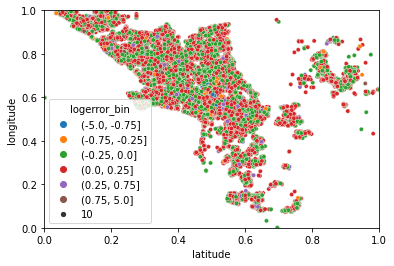

In [77]:
fig, ax = plt.subplots()
sns.scatterplot(data = trainExplore, x = 'latitude', y= 'longitude', hue = 'logerror_bin', size = 10)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.show()

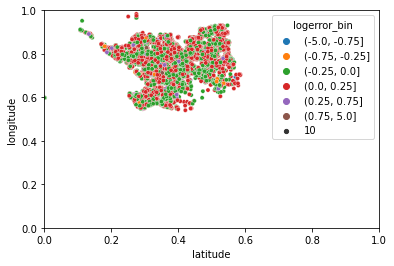

In [78]:
fig, ax = plt.subplots()
sns.scatterplot(data = trainExplore[trainExplore.LCluster1 == 1], x = 'latitude', y= 'longitude', hue = 'logerror_bin', size = 10)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
plt.show()

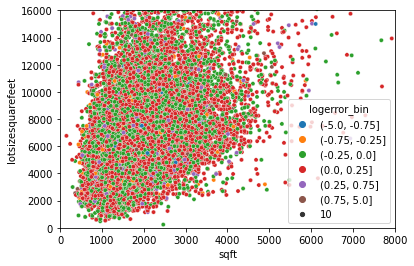

In [79]:
fig, ax = plt.subplots()
sns.scatterplot(data = trainExplore, x = 'sqft', y= 'lotsizesquarefeet', hue = 'logerror_bin', size = 10)
ax.set_xlim(0,8000)
ax.set_ylim(0,16000)
plt.show()

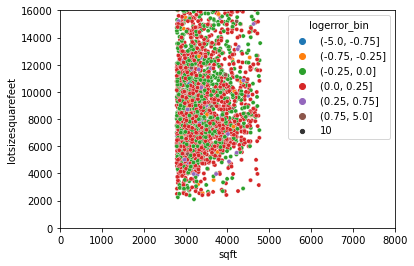

In [80]:
fig, ax = plt.subplots()
sns.scatterplot(data = trainExplore[trainExplore.FCluster2 == 1], x = 'sqft', y= 'lotsizesquarefeet', hue = 'logerror_bin', size = 10)
ax.set_xlim(0,8000)
ax.set_ylim(0,16000)
plt.show()

In [81]:
newdf = trainExplore['logerror','']

KeyError: ('logerror', '')

In [ ]:
locCluster = trainExplore[trainExplore.LCluster1 == 1]
foundCluster = trainExplore[trainExplore.FCluster2 == 1]
locCluster = pd.DataFrame(locCluster)
foundCluster = pd.DataFrame(foundCluster)

In [ ]:
sns.boxplot(locCluster.logerror )

In [ ]:
sns.boxplot(trainExplore.logerror)

In [ ]:
sns.boxplot(foundCluster.logerror )

In [ ]:
sns.boxplot(trainExplore.logerror )

In [ ]:
trainExplore